# Python для визуализации данных

Татьяна Рогович, НИУ ВШЭ


## Визуализация для презентации данных
Во-первых, кроме привычных вам графиков существует еще огромное множество всего (и некоторые вещи работают гораздо лучше привычных нам). Python умеет строить и сложные штуки.
Есть несколько классных сайтов, которые помогают выбрать подходящий график для ваших данных:

https://www.data-to-viz.com/

https://datavizproject.com/

https://datavizcatalogue.com/RU/

Сегодня мы будем работать с несколькими датасетами, чтобы посмотреть разные виды графиков.


In [2]:
# наша основная библиотека для визуализаций
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np

# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline  

# Линейный график (trend line, line plot): кто живет в лесу?

Сначала будем работать с синтетическим набором данных "Кто живет в лесу". У нас есть переменная год и переменные, которые обозначают, сколько в этом году было в лесу зайцев, рысей и морковок.

In [3]:
# если файл не лежит в рабочей директории jupyter, то не забудьте прописать полный путь к нему
# также обратите внимание, что данные в файле разделены не запятыми, а табуляцией - добавим параметр, который
# сообщает пандас нужный знак разделителя
forest = pd.read_csv('populations.txt', sep='\t')
forest.head()

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


In [4]:
forest.shape

(21, 4)

Давайте для начала посмотрим как выглядит объект, который создает matplotlib И разберемся, как строить в нем графики.
Первый вариант создания графика - plt.plot(), которому мы просто можем передать два аргумента - что положить на ось x, а что на y. Если у вас переменные в числовом формате, то без проблем получите линейный график (line plot)


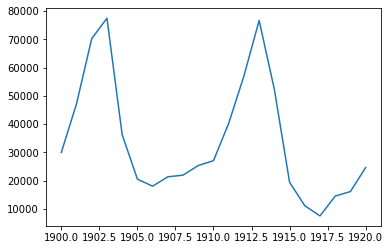

In [5]:
plt.plot(forest.year, forest.hare); # первый аргумент - ось x, второй аргумент - ось y.

Чтобы построить столбчатую диаграмму - меняем функцию plot на bar. 
Все виды графиков и функций можно найти в документации matplotlib 
https://matplotlib.org/api/pyplot_summary.html

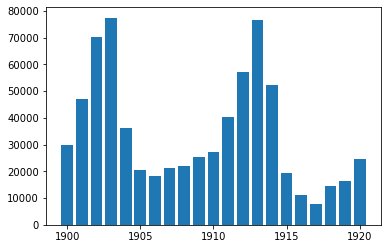

In [6]:
plt.bar(forest.year, forest.hare);

Давайте вернемся к нашему линейному график, сохраним его в переменной и попробуем сделать его посимпатичней. 

В идеальной вселенной мы создаем графики функцией subplots (которая может, например, создать систему из нескольких графиков) и сложить то, что она генириует в две переменные. Обычно их называют fig и ax.

Переменная fig (или как вы ее назвали. Тут главное, что это первая переменная, которую вы определили) отвечает за график вцелом. Воспринимайте ее как файл, который хранит график как картинку.

Переменная ax (так, которую мы определяем второй) - это ось координат, на которой мы собственно строим график. Мы можем настраивать внешний вид этого объекта (потому что все элементы графика хранятся как раз в ней).


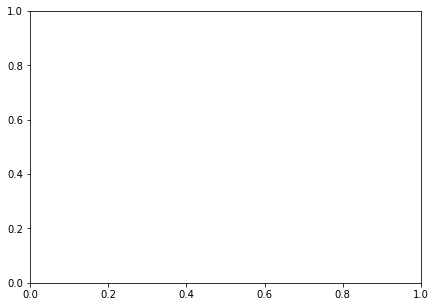

In [10]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) # создали объект из 1 ряда 1 колонки графика (что сюрприз - один график!)
                                           # Размер - по сути это размер нашего прямоугольника в неочевидных единицах. 
                                           # Какой размер удачный? экспериментируйте!

Выше мы создали пустую шкалу координат. Давайте теперь попробуем наложить на нее график.

In [65]:
forest.head()  # вспомнили, какие переменные у нас есть.

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


Посмотрим, как выглядит наш график по умолчанию.

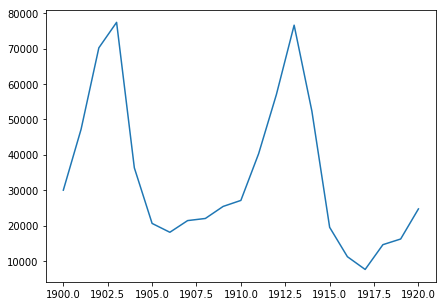

In [8]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) # создаем переменную заново, чтобы вы точно стирали то, что в ней лежит на каждом шаге,
                                           # если вы захотите внести измения в код
ax.plot(forest.year, forest.hare)  # обратите внимание - график мы теперь строим как метод объекта ax. 
                                   # Ниже все модификации графика тоже применяем к объекту.


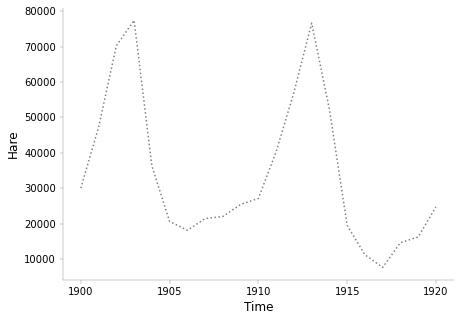

In [15]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) 

# параметры самого графика (цвет линии, стиль и т.д.) определяем как параметры в методе plot()
# меняем цвет и стиль линии на пунктир. Matplotlib знает некоторые стандартные цвета, и их можно задать прямо словом
# так же можно передать hex цвет. Например, #8c92ac
ax.plot(forest.year, forest.hare, color = 'grey', ls = ':')  


# если вы обратили внимание, то в нашем самом первом графике шкала с годами сломамлась и стала float. Matplotlib принудительно 
# делает x непрерывной переменной для линейного графика. Мы хотим оставить шкалу год в целых числах.
ax.locator_params(integer=True) 

# называем шкалы x и y, выбираем размер шрифта.
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Hare', fontsize=12)

# делаем правую и верхнюю границу графика невидимыми
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# делаем засечки на шкалах x и y потоньше
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)

# уменьшаем толщину оставших границ графика с помощью цикла (можно и без цикла отдельной строкой для каждой границы, как делали выше)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)

Больше видов графиков и параметров, которые мы можем изменять - в документации Matplotlib. 

## Упражнение
Сейчас мы посмотрим, как создавать систему графиков и попробуем построить тренды для всех обитателей нашего леса.


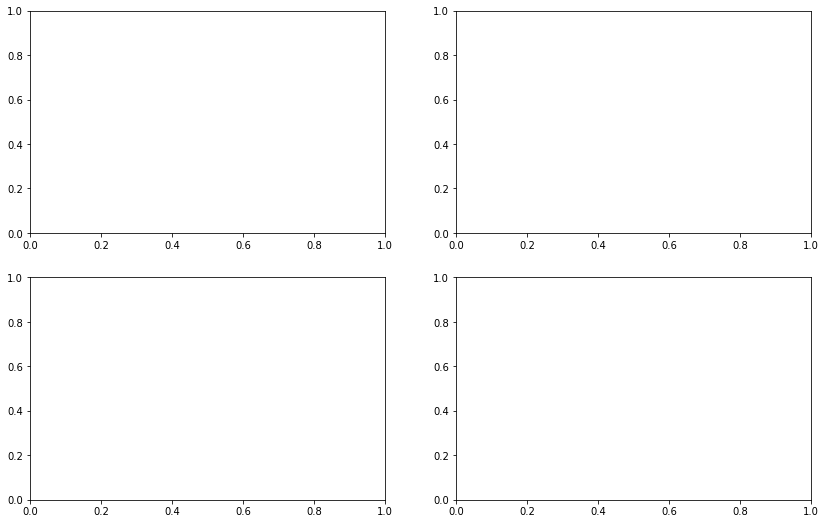

In [10]:
fig, ax = plt.subplots(2,2, figsize=(14,9)) # увеличиваем количество объектов до двух рядов и двух колонок. Также увеличиваем размер изображения.

Класс, теперь у нас есть четыре графика. Теперь объект ax - это некоторая матрица (или вложенный список - как вам удобнее воспринимать). И чтобы обратиться к каждому графику, нужно обратиться к нему по индексу.


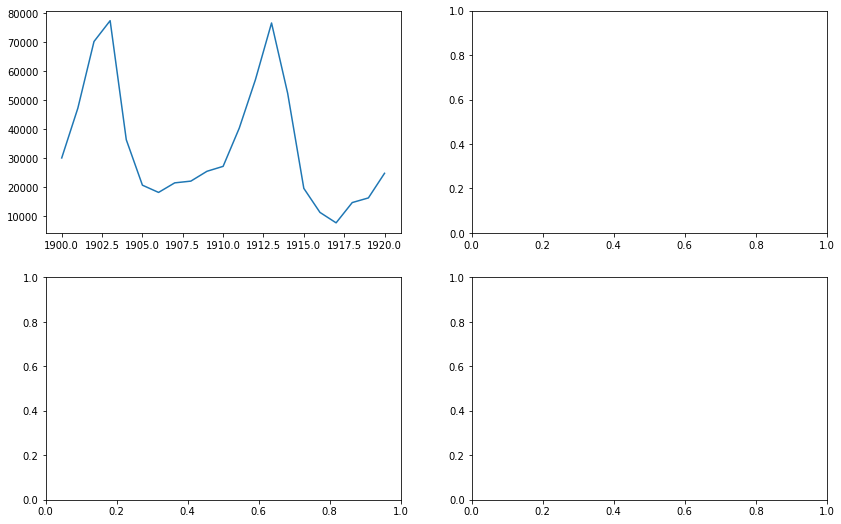

In [11]:
fig, ax = plt.subplots(2,2, figsize=(14,9))
ax[0][0].plot(forest.year, forest.hare)  # Обращаемся к первому графику в первой колонке.

Ниже посмотрим как с помощью цикла for можно применить какую-то модификацию ко всем графикам системы.

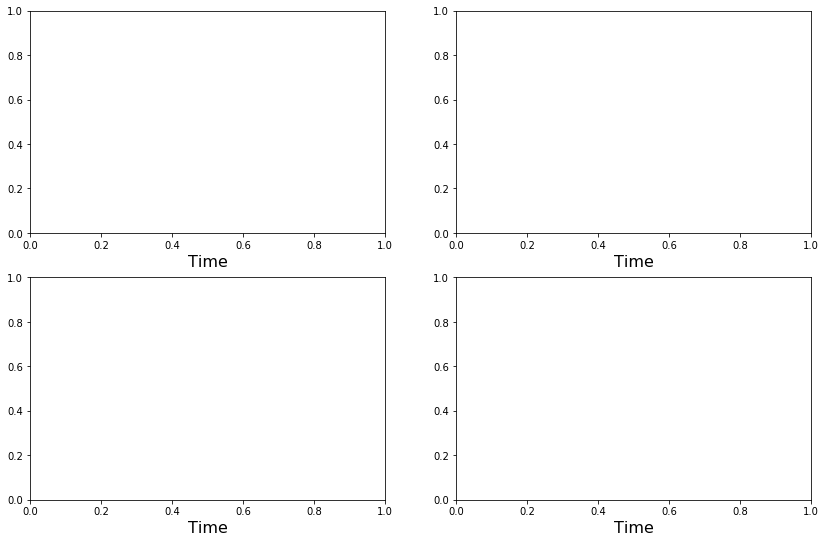

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(14,9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('Time', fontsize = 16)

**Задание (10 минут):**

* Нарисуйте во втором графике изменения в популяции рысей.
* В третьем - морковки.
* В четвертом - все три графика вместе (подумайте как).
* Каждый график должен быть разного цвета. В четвертом графике - каждый график должен быть такого же цвета, как и в своей ячейке.
* Подпишите шкалы y и x для каждого графика.

Если вы знаете цикл for - попробуйте написать цикл, который бы массово применял изменения во внешнем виде графика (например, удалял бы верхние и правые границы у всех графиков)



**Пример решения:**

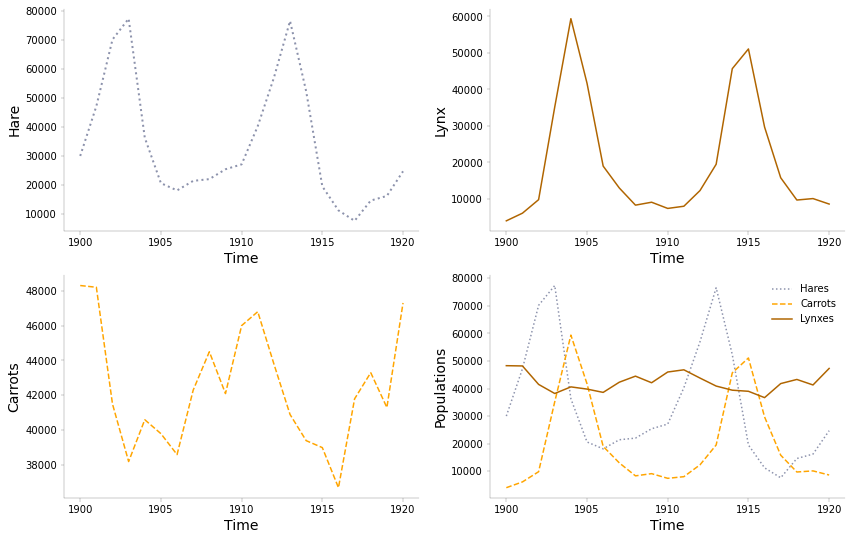

In [22]:
fig, ax= plt.subplots(2, 2, figsize=(14,9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('Time', fontsize=14)
        ax[x][y].locator_params(integer=True)
        ax[x][y].spines['right'].set_visible(False)
        ax[x][y].spines['top'].set_visible(False)
        ax[x][y].xaxis.set_tick_params(width=0.2)
        ax[x][y].yaxis.set_tick_params(width=0.2)
        for axis in ['top','bottom','left','right']:
            ax[x][y].spines[axis].set_linewidth(0.2)

        
ax[0][0].plot(forest.year, forest.hare, color='#8c92ac', ls = ':', lw=2)
ax[0][0].set_ylabel('Hare', fontsize=14)

ax[1][0].plot(forest.year, forest.carrot, color='#ffa500', ls = '--')
ax[1][0].set_ylabel('Carrots', fontsize = 14)

ax[0][1].plot(forest.year, forest.lynx, color='#b06500', ls = '-'); 
ax[0][1].set_ylabel('Lynx', fontsize = 14)

ax[1][1].plot(forest.year, forest.hare, label = 'Hares', color='#8c92ac', ls = ':')
ax[1][1].plot(forest.year, forest.lynx, label = 'Carrots', color='#ffa500', ls = '--')
ax[1][1].plot(forest.year, forest.carrot, label = 'Lynxes', color='#b06500', ls = '-')
ax[1][1].set_ylabel('Populations', fontsize = 14)
ax[1][1].legend(loc=1, fontsize=10, frameon=False); # задаем легенду. loc отвечает за ее местоположение (экспериментируйте!), frameon - налиичие рамки вокруг легенды.



In [23]:
# сохраняем график. Если не зададите путь - сохранится в ту папку, которую сейчас jupyter считает рабочей 
# (то, что вы видете на первом экране в браузере, когда запускаете jupyter)
fig.savefig("my_new_plot.png") 

# Мультивариативный график рассеяния (multivariate scatter plot): преступления в США

Сейчас будем работать с наборам данных, который содержит информацию о количестве преступлений в штатах США в 2005 году. 

In [24]:
crimes = pd.read_csv('crimeRatesByState2005.tsv', sep='\t')  # тут разделитель - тоже табуляция
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


In [25]:
crimes.shape

(50, 9)

Давайте начнем с графика с двумя переменным. Тут все просто - непрерывная переменная по x, непрерывная переменная по y: а точка на пересечении значений x и y - место нашего штата в этой системе  координат. Давайте для начала построим график для убийств и ограблений. График рассеяния можно использовать и для категориальных переменных - посмотрим на другом примере.

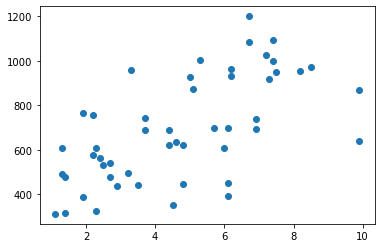

In [29]:
fig, ax = plt.subplots()  # если нужно создать один график, то можем не указывать количество в аргументах
ax.scatter(crimes['murder'], crimes['burglary']);  # вместо метода plot используем scatter

Попробуйте проинтерпретировать график выше. Дальше мы попробуем закодировать в нем еще две переменные. Есть идеи как?

Мульвариативный график - это такой график, из которого мы можем считать значения для более чем двух переменных. Самый простой способ закодировать дополнительную информацию - цыет и размер точки. Давайте добавим значение переменной population (размер населения штата) на график как размер точки.

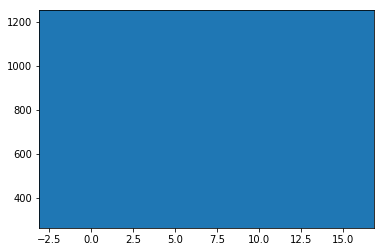

In [16]:
fig, ax = plt.subplots()

# добавляем параметр s (size) и говорим, какая переменная будет за него отвечать
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population'])  


Воу! Размер населения такой большой, что точка захватила всю область координат. Давайте попробуем нашу переменную масштабировать - нам же важны относительные размеры штатов относительно друг друга, а не абсолютные значения. Значения маштабирования тоже выбираем экспериментально: то, что лучше выглядит и более информативно.

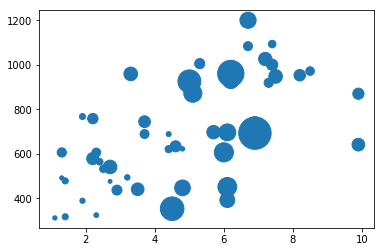

In [17]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000)

Класс, только некоторые точки слились. Давайте добавим параметр прозрачности, чтобы было видно, где они накладываются друг на друга.

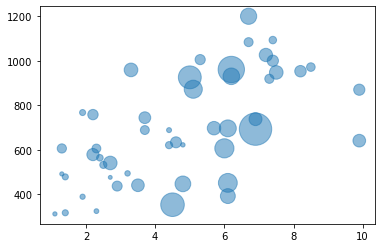

In [37]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'],
           crimes['burglary'],
           s=crimes['population'] / 35000,
           alpha=0.5)  # параметр alpha задает прозрачность точки от 0 до 1

Давайте попробуем проинтерпретировать этот график. А потом добавим еще какую-нибудь переменную в виде цвета.

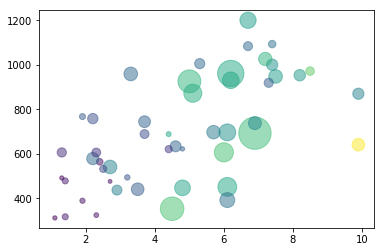

In [19]:
fig, ax = plt.subplots()
ax.scatter(
    crimes['murder'],
    crimes['burglary'],
    s=crimes['population'] / 35000,
    alpha=0.5,
    c=crimes['Robbery']
)  # задаем новый аргумент c (color) и присваиваем ему значение переменной

Осталось узнать, что значит какой цвет. Для этого нужно сохранить график в переменную и передать ее как аргумент функции colorbar().
Также можем поменять цветовую шкалу с помощью аргумента cmap (какие цветовые картыесть в matplotlib? Гуглим документацию!).

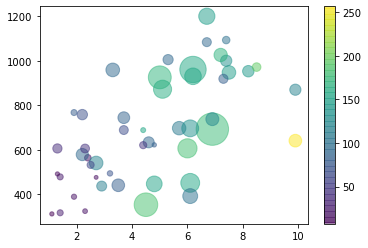

In [40]:
fig, ax = plt.subplots()
color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         alpha=0.5,
                         cmap='viridis',
                         c=crimes['Robbery'])
plt.colorbar(color_graph);

Проинтерпретируем?

**Для самостоятельного изучения: сделаем симпатичней и подпишем штаты**

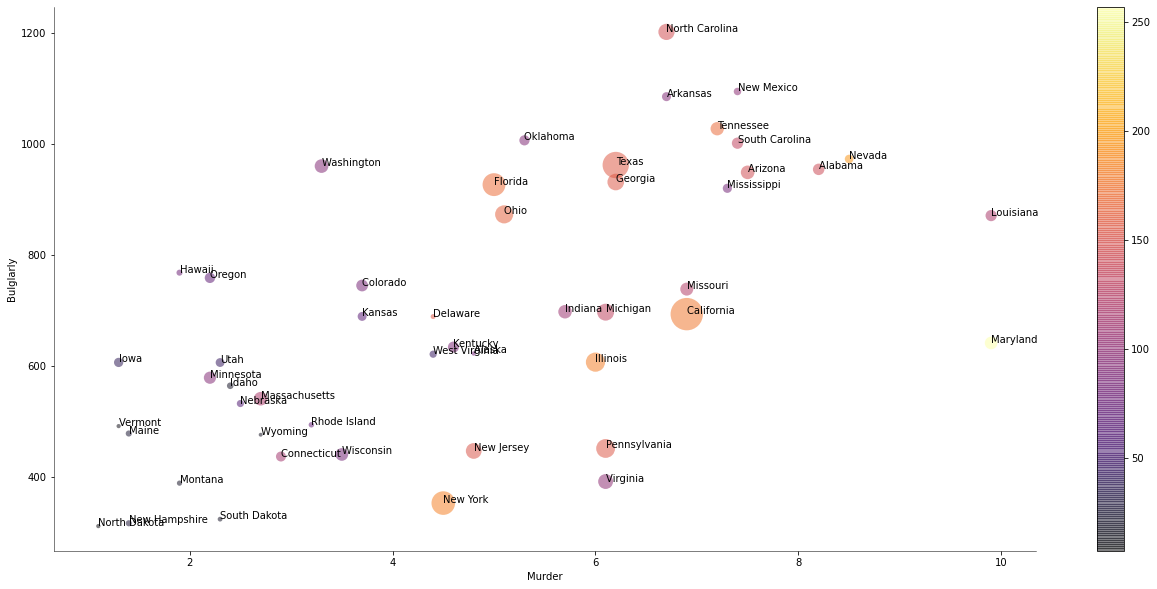

In [41]:
fig, ax = plt.subplots(figsize=(22, 10))

color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         c=crimes['Robbery'],
                         cmap='inferno',
                         alpha=0.5,
                         linewidth=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.set_xlabel('Murder', fontsize=10)
ax.set_ylabel('Bulglarly', fontsize=10)

for i, state in enumerate(
        crimes['state']
):  # с помощью enumerate создаем из колонок с названиями штатов объект кортежей вида индекс - название штата.
    ax.annotate(
        state, (crimes['murder'][i], crimes['burglary'][i]), fontsize=10
    )  # используем метод annotate, которому говорим, что нужно брать имя штата
    # из кортежа, который создали с помощью enumerate, а координаты подписи задаем через
    # значения наших переменных x и y для нужного индекса из объекта enumerate (обращается к нужному
    # ряду в датафрейме)

plt.colorbar(color_graph)
plt.savefig('crimes.png')  # сохраняем

In [23]:
# смотрим что внутри объекта enumerate()
list(enumerate(crimes['state']))

[(0, 'Alabama '),
 (1, 'Alaska '),
 (2, 'Arizona '),
 (3, 'Arkansas'),
 (4, 'California '),
 (5, 'Colorado '),
 (6, 'Connecticut '),
 (7, 'Delaware '),
 (8, 'Florida '),
 (9, 'Georgia '),
 (10, 'Hawaii '),
 (11, 'Idaho '),
 (12, 'Illinois '),
 (13, 'Indiana '),
 (14, 'Iowa '),
 (15, 'Kansas  '),
 (16, 'Kentucky  '),
 (17, 'Louisiana '),
 (18, 'Maine '),
 (19, 'Maryland '),
 (20, 'Massachusetts'),
 (21, 'Michigan'),
 (22, 'Minnesota '),
 (23, 'Mississippi '),
 (24, 'Missouri '),
 (25, 'Montana  '),
 (26, 'Nebraska '),
 (27, 'Nevada '),
 (28, 'New Hampshire '),
 (29, 'New Jersey'),
 (30, 'New Mexico '),
 (31, 'New York'),
 (32, 'North Carolina '),
 (33, 'North Dakota '),
 (34, 'Ohio '),
 (35, 'Oklahoma '),
 (36, 'Oregon '),
 (37, 'Pennsylvania'),
 (38, 'Rhode Island '),
 (39, 'South Carolina '),
 (40, 'South Dakota '),
 (41, 'Tennessee '),
 (42, 'Texas '),
 (43, 'Utah'),
 (44, 'Vermont '),
 (45, 'Virginia '),
 (46, 'Washington '),
 (47, 'West Virginia '),
 (48, 'Wisconsin '),
 (49, 'Wyom

# График рассеяния на аггрегированном датасете (возможности анимации)

Следующий небольшой пример сделаем на датасете проекта gapminder - это набор социо-экономических индикаторов для ряда стран за 200 лет. Мы возьмем небольшой срез набора данных с 1957 года с шагом пять лет и две переменные - ВВП на душу населения (gdp per capita) и продолжительность жизни.

www.gapminder.org

In [43]:
gapminder = pd.read_csv('gapminderData.csv')
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [44]:
gapminder.shape

(1704, 6)

In [24]:
gapminder.year.values  # смотрим, какие значения есть в колонке год

array([1952, 1957, 1962, ..., 1997, 2002, 2007], dtype=int64)

Сделаем колонку continent категориальной (вам это скорее всего пригодится в ДЗ для работы с вашими данными).

In [45]:
gapminder['continent'] = pd.Categorical(gapminder['continent'])

In [71]:
gapminder['continent'].cat.codes.head()  # теперь у нас есть такая числовая разметка категорий, которую мы сможем скормить переменной графика

0    2
1    2
2    2
3    2
4    2
dtype: int8

In [68]:
gapminder['continent'].unique()

['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
Categories (5, object): ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

Еще мы с вами будем хотеть логарифмировать переменную gpd. Многие переменные, связанные, например, с доходом имеют логарифмическое распределение (что логично - у нас очень много людей или стран с каким-то небольшим достатком и есть очень длинный хвост наблюдений с большими значениями по шкале).


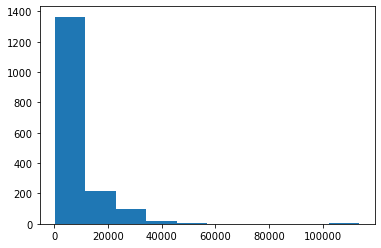

In [47]:
plt.hist(gapminder['gdpPercap']);

C логарифмированием шкалы мы избавимся от длинного хвоста (ниже посмотрим, как это влияент на график.)
Начет логарифмированных шкал нужно волноваться в статистических моделях, потому что от этого у вас поменяется интерпретация коэффицентов. Сейчас нам достаточно понимать, что у стран, находящихся правее по шкале - ВВП на душу населения выше.

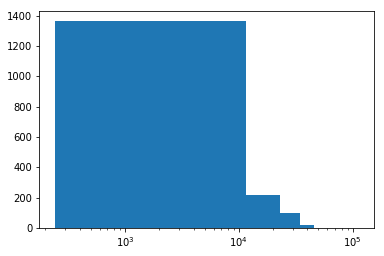

In [28]:
plt.hist(gapminder['gdpPercap'])
plt.xscale('log')


## Упражнение
Сейчас в наборе данных у нас есть каждая страна в каждый год с 1952 по 2007.
Давайте сделаем срез для 1952 года и попробуем построить график рассения (почти то же самое, что делали выше):

* x - доход
* y - продолжительность жизни
* размер - население
* цвет - континент

Подпишем шкалы x и y.


**Пример без лог-преобразования шкалы x**

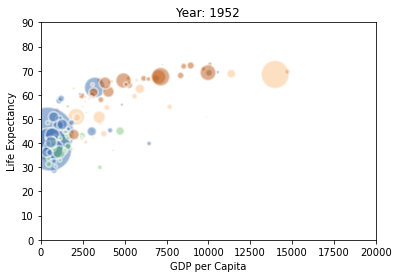

In [58]:
tmp = gapminder[gapminder.year == 1952 ]
plt.scatter(tmp['gdpPercap'], tmp['lifeExp'], s = tmp['pop']/200000, 
            c=tmp['continent'].cat.codes, cmap= "Accent", alpha=0.5, 
            edgecolors="white", linewidth=2) # добавили два новых аргумента - цвет и обводка границ точек.
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Year: "+str(1952))  # заголовок графика
plt.ylim(0, 90)  # давайте еще добавим лимиты шкал, чтобы шкала не менялась, когда мы будем строить графики для других годов
plt.xlim(0,20000);

**То же самое, но с лог-преобразованием**

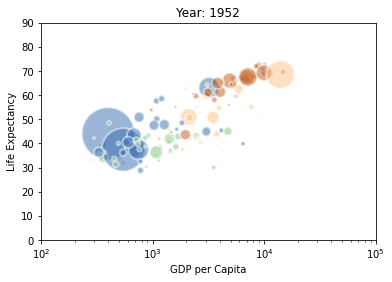

In [62]:
tmp = gapminder[gapminder.year == 1952]
plt.scatter(tmp['gdpPercap'],
            tmp['lifeExp'],
            s=tmp['pop'] / 200000,
            c=tmp['continent'].cat.codes,
            cmap="Accent",
            alpha=0.5,
            edgecolors="white",
            linewidth=2)
plt.xscale('log')
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Year: " + str(1952))
plt.ylim(0, 90)
plt.xlim(100, 100000);# меняем лимиты для лог-шкалы

А теперь давайте автоматизируем эту красоту, чтобы получить график для каждой пятилетки с 1952 до 2007. Потом при желании мы можем их собрать в gif в какой-нибудь программе и получить анимированный график.

In [67]:
gapminder['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

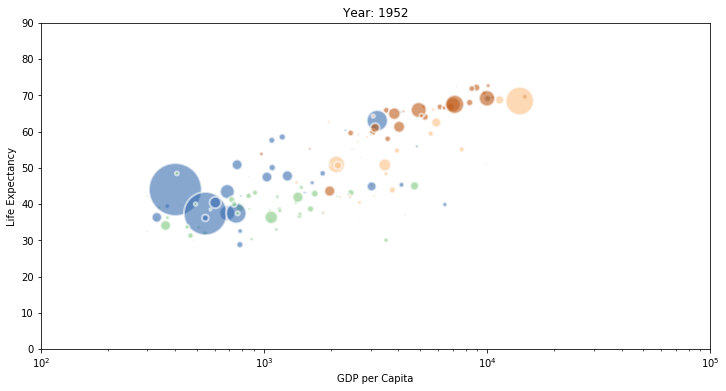

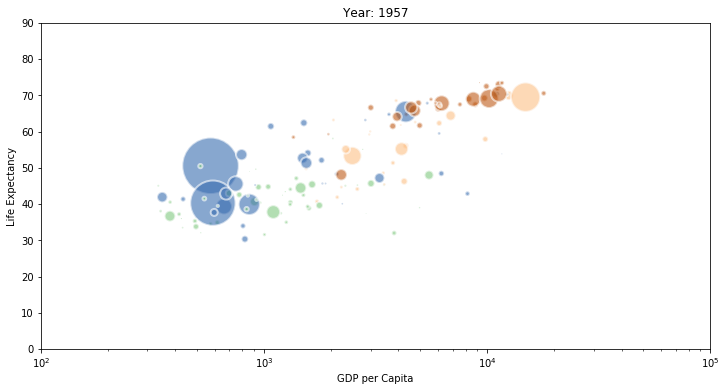

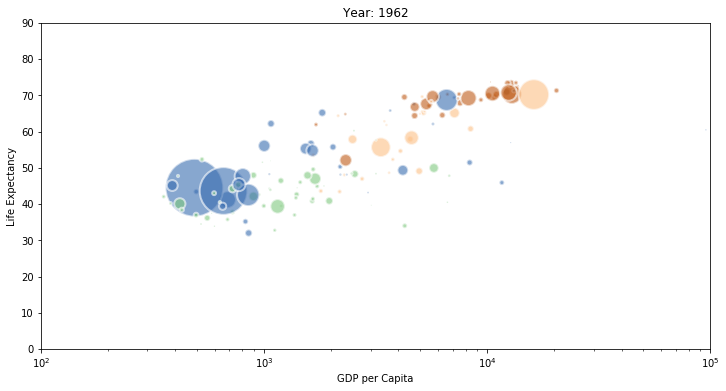

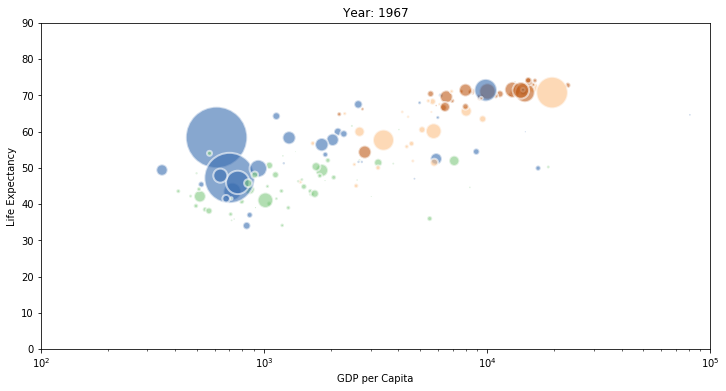

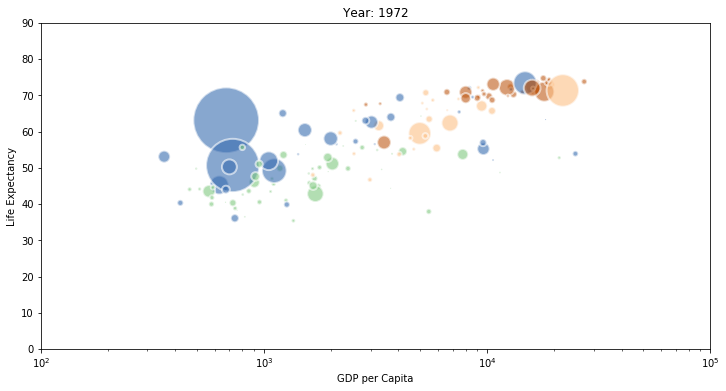

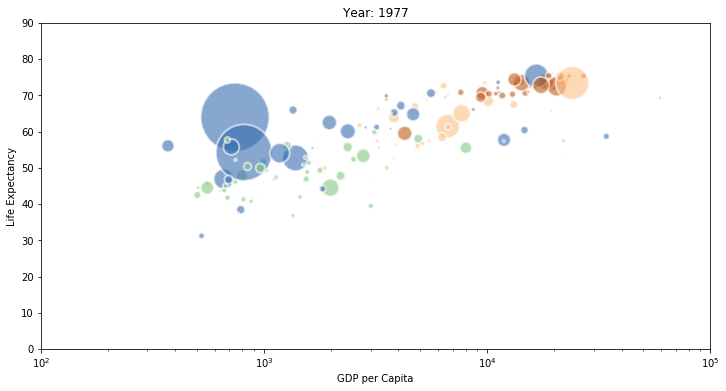

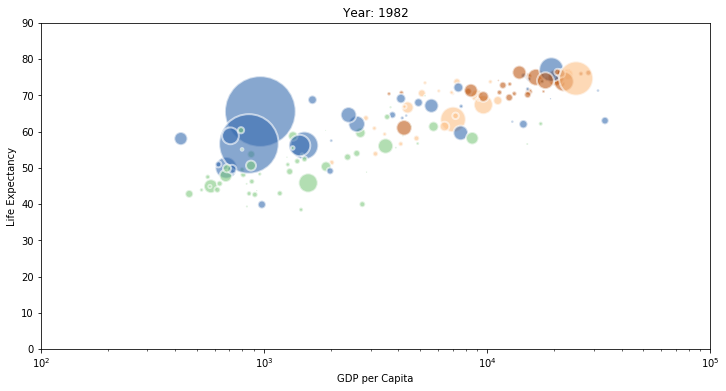

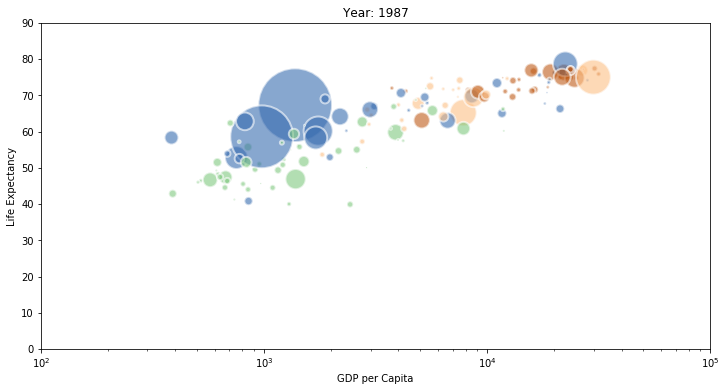

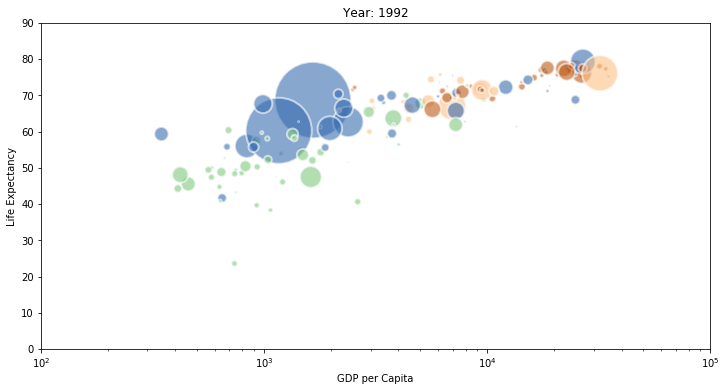

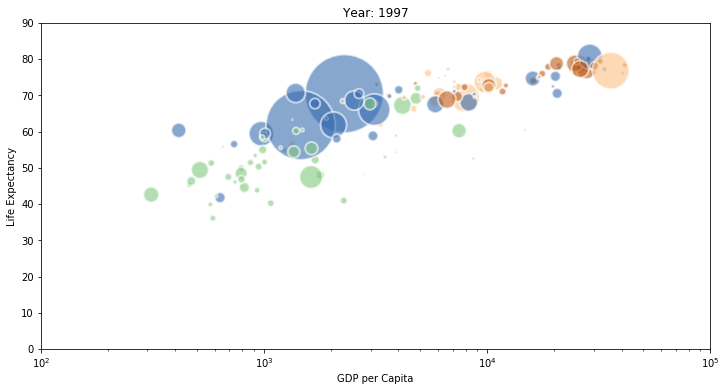

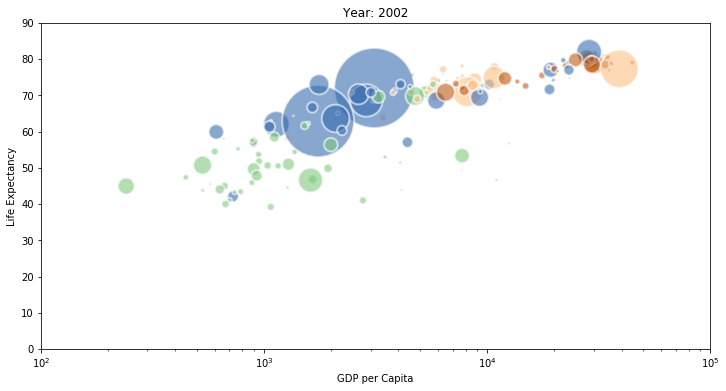

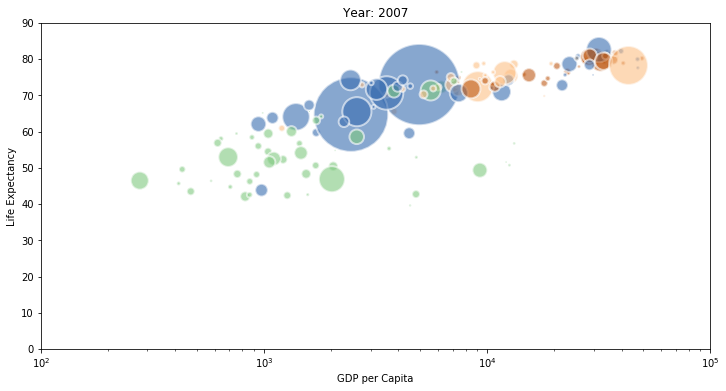

In [31]:
for i in gapminder.year.unique(): # пишем цикл, который проходит по всем уникальным значениям в колонке год
 
    # создаем фигуру
    fig = plt.figure(figsize=(12, 6))

    tmp = gapminder[gapminder.year == i]  # создаем срез датафрейма для года на данной итерации
    plt.scatter(tmp['gdpPercap'], tmp['lifeExp'], s=tmp['pop']/200000 , 
                c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    plt.xscale('log')
    plt.xlabel("GDP per Capita")
    plt.ylabel("Life Expectancy")
    plt.title("Year: "+str(i) )
    plt.ylim(0, 90)
    plt.xlim(100,100000)
    
       
    # Сохраняем каждый график под уникальным именем.
#     filename='Gapminder_step'+str(i)+'.png'
#     plt.savefig(filename, dpi=96)


# Графики для категориальных переменных: столбчатые диаграммы, совмещенные столбчатые диаграммы, график рассеяния для категориальных переменных

Тут будем работать по мотивам вот этого блокнота.

https://nbviewer.jupyter.org/github/yaph/ipython-notebooks/blob/master/movie-body-counts.ipynb

Бдуем работать с датасетом, который подсчитывает количество смертей в фильмах (меотодологию сбора данных можно посмотреть по ссылке выше). Несколько графиков мы рассмотрим на занятии, остальные можно изучить самостоятельно.

Очень часто для того, чтобы получить тот график, который хотим - нужно сделать правильную группировку. С этим тоже тут поработаем.


In [72]:
movies = pd.read_csv('filmdeathcounts.csv')
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7


Для начала нам нужно решить две проблемы - в колонках Genre и Director может быть несколько значений. Давайте подумаем, как их извлечь.
Также создадим две новые переменные - FilmCount c единицами во сех колонках (понадобится потом для графиков) и Body_Count_Min (количество смертей в минуту экранного времени).


In [73]:
movies['Film_Count'] = 1
movies['Body_Count_Min'] = movies['Body_Count'] / movies['Length_Minutes'].astype(float)
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3,1,0.059829
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6,1,0.469027
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0,1,2.120000
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6,1,0.592920
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,1,5.128205


In [96]:
# мы будем работать с итератором iterrows, посмотрим, что он возвращает
for i in movies.iterrows():
    print(i)
    print('____________________')
    print(i[0])
    print('____________________')
    print(i[1])
    print('____________________')

    break

(0, Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                       0.0598291
Name: 0, dtype: object)
____________________
0
____________________
Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                     

In [74]:
'Biography|Comedy|Drama|Music'.split('|')

['Biography', 'Comedy', 'Drama', 'Music']

Теперь давайте попробуем реализовать нашу идею на одном примере.

In [75]:
di = {}
idx = 0
col = 'Genre'
sep='|'

for i in movies.iterrows(): # проходимся по наблюдениям
    d = i[1] # достаем первый объект, в котором хранятся все переменные, кроме индекса 
    print(d)
    print('_____')
    names = d[col].split(sep) # разбиваем колонку жанр по разделителю
    print(names)
    print('_____')
    for name in names:
        c = d.copy() # работаем с копией нашего фильма, чтобы не перезаписать его
        print(c)
        print('_____')
        c[col] = name # меняем в копии значение в колонке Genre
        print(c)
        print('_____')
        di[idx] = c # кладем нашу новую колонку в словарь под текущим индексом
        idx += 1 # обновляем индекс
        print(di)
        print('_____')
        
    break

Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                        0.059829
Name: 0, dtype: object
_____
['Biography', 'Comedy', 'Drama', 'Music']
_____
Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                

In [76]:
pd.DataFrame(di) # как будет выглядеть наш новый датафрейм

,0,1,2,3
Film,24 Hour Party People,24 Hour Party People,24 Hour Party People,24 Hour Party People
Year,2002,2002,2002,2002
Body_Count,7,7,7,7
MPAA_Rating,R,R,R,R
Genre,Biography,Comedy,Drama,Music
Director,Michael Winterbottom,Michael Winterbottom,Michael Winterbottom,Michael Winterbottom
Length_Minutes,117,117,117,117
IMDB_Rating,7.3,7.3,7.3,7.3
Film_Count,1,1,1,1
Body_Count_Min,0.059829,0.059829,0.059829,0.059829


In [99]:
pd.DataFrame(di).transpose() # транспонируем. Отлично, то, что нужно!

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography,Michael Winterbottom,117,7.3,1,0.0598291
1,24 Hour Party People,2002,7,R,Comedy,Michael Winterbottom,117,7.3,1,0.0598291
2,24 Hour Party People,2002,7,R,Drama,Michael Winterbottom,117,7.3,1,0.0598291
3,24 Hour Party People,2002,7,R,Music,Michael Winterbottom,117,7.3,1,0.0598291


Теперь соберем все в функцию. Помним, что будем ее применять к двум колонкам по очереди (режиссер и жанр).

In [77]:
def expand_col(df_src, col, sep='|'):
    di = {}
    idx = 0
    for i in df_src.iterrows():
        d = i[1]
        names = d[col].split(sep)
        for name in names:
            # operate on a copy to not overwrite previous director names
            c = d.copy()
            c[col] = name
            di[idx] = c
            idx += 1

    df_new = pd.DataFrame(di).transpose()
    
    return df_new

In [78]:
movies.shape

(545, 10)

In [79]:
df_dir = expand_col(movies, 'Director') # примениям к режиссерам
df_dir.shape

(570, 10)

In [80]:
df_genre = expand_col(df_dir, 'Genre') # а теперь уже датафрейм с обработанными режиссерами, обрабатываем на жанры
df_genre.shape

(1759, 10)

In [81]:
df_genre.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
1,24 Hour Party People,2002,7,R,Comedy,Michael Winterbottom,117,7.3,1,0.059829
2,24 Hour Party People,2002,7,R,Drama,Michael Winterbottom,117,7.3,1,0.059829
3,24 Hour Party People,2002,7,R,Music,Michael Winterbottom,117,7.3,1,0.059829
4,28 Days Later,2002,53,R,Horror,Danny Boyle,113,7.6,1,0.469027


In [82]:
# проверим, есть ли дубликаты
df_genre.drop_duplicates().shape

(1751, 10)

In [83]:
# сохраним результат в переменную movies
movies = df_genre.drop_duplicates()
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
1,24 Hour Party People,2002,7,R,Comedy,Michael Winterbottom,117,7.3,1,0.059829
2,24 Hour Party People,2002,7,R,Drama,Michael Winterbottom,117,7.3,1,0.059829
3,24 Hour Party People,2002,7,R,Music,Michael Winterbottom,117,7.3,1,0.059829
4,28 Days Later,2002,53,R,Horror,Danny Boyle,113,7.6,1,0.469027


In [130]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1758
Data columns (total 10 columns):
Film              1751 non-null object
Year              1751 non-null object
Body_Count        1751 non-null object
MPAA_Rating       1751 non-null object
Genre             1751 non-null object
Director          1751 non-null object
Length_Minutes    1751 non-null object
IMDB_Rating       1751 non-null object
Film_Count        1751 non-null object
Body_Count_Min    1751 non-null object
dtypes: object(10)
memory usage: 150.5+ KB


Наши переменные после обработки функцией распознаются как текстовые. Давайте это исправим.

In [85]:
for col in ['Body_Count', 'Length_Minutes', 'Film_Count', 'Body_Count_Min']:
    movies.loc[:, col] = movies[col].astype(float)

/Users/a18509896/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [86]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1758
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Film            1751 non-null   object 
 1   Year            1751 non-null   object 
 2   Body_Count      1751 non-null   float64
 3   MPAA_Rating     1751 non-null   object 
 4   Genre           1751 non-null   object 
 5   Director        1751 non-null   object 
 6   Length_Minutes  1751 non-null   float64
 7   IMDB_Rating     1751 non-null   object 
 8   Film_Count      1751 non-null   float64
 9   Body_Count_Min  1751 non-null   float64
dtypes: float64(4), object(6)
memory usage: 150.5+ KB


Обратите внимание, что мы работаем с таким датасетом, где один и тот же фильм может встречаться несколько раз (это связано с тем, что он может относиться к нескольким жанрам или имеет несколько режиссеров - эта информация добавляет дополнительные ряды). Поэтому при некоторых агрегациях будем выкидывать дубликаты из колонки Film, чтобы не было задвоения.

In [87]:
movies.shape # размер оригинального датафрейма

(1751, 10)

In [88]:
movies.drop_duplicates('Film').shape # размер датафрейма для уникальных фильмов

(537, 10)

Давайте сгруппируем фильмы по году и суммируем значения для того, чтобы построить столбчатый график.

## Агрегация по годам. Столбчатый график

Давайте построим два столбчатых графика, которые показывают количество фильмов за каждый год и общее количество смертей на экране.

In [89]:
movies_year = movies.drop_duplicates('Film').groupby('Year').sum()

In [90]:
movies_year.tail()

,Body_Count,Length_Minutes,Film_Count,Body_Count_Min
Year,,,,
2007,4095.0,5475.0,48.0,35.992220
2008,1785.0,2850.0,26.0,16.522174
2009,605.0,1235.0,11.0,5.708305
2010,519.0,463.0,4.0,4.528441
2013,156.0,119.0,1.0,1.310924


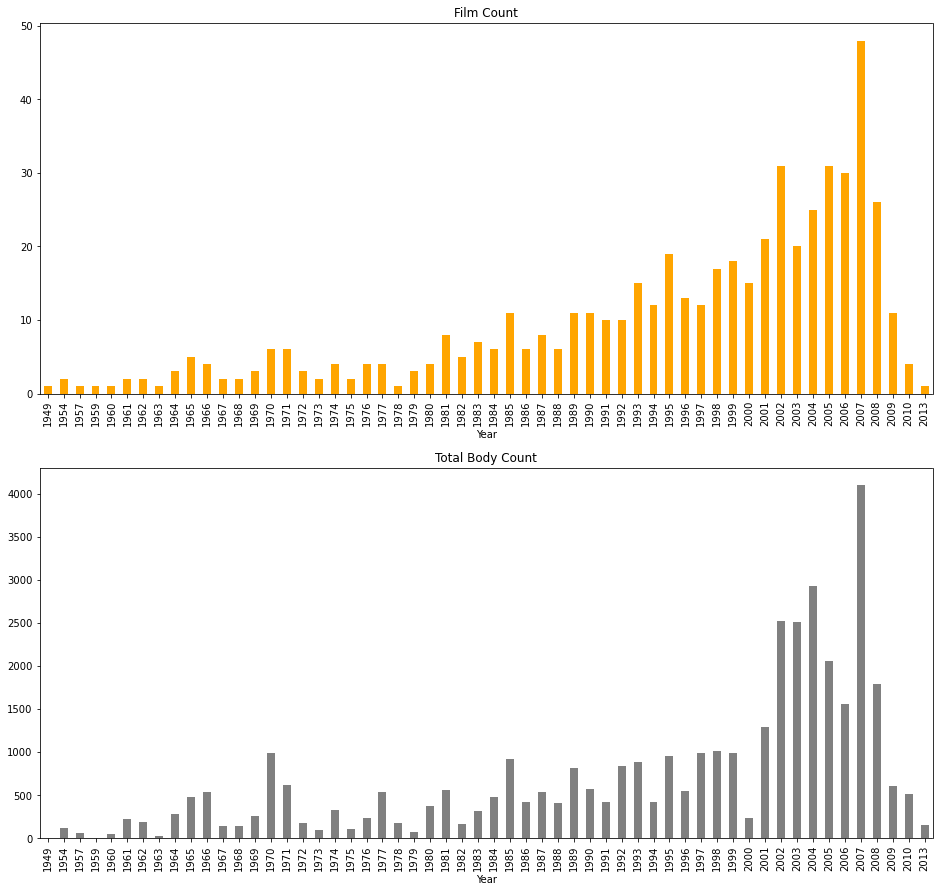

In [91]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))

# обратите внимание, что здесь меняем синтаксис - делаем график, применяем метод plot из пандас к колонке. 
# И уже в параметрах этого метода прописываем тип графика и ось координат, на которую хотим его положить. 
# При таком подходе у нас каждый год отобразится на оси координат

movies_year['Film_Count'].plot(kind='bar', ax=ax[0], color = '#ffa500')
ax[0].set_title('Film Count')

movies_year['Body_Count'].plot(kind='bar', ax=ax[1], color = 'grey')
ax[1].set_title('Total Body Count');

## Агрегация по фильмам. Сортировка по значения. Горизонтальный столбчатый график

Сейчас мы сгруппируем датасет по фильмам, найдем 10 самых жестоких и визуализируем их.

In [92]:
movies_film = movies.drop_duplicates('Film').set_index('Film') # агрегируем и делаем индексом название фильма, так как индекс станет шкалой
movies_film.head()

,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Film,,,,,,,,,
24 Hour Party People,2002,7.0,R,Biography,Michael Winterbottom,117.0,7.3,1.0,0.059829
28 Days Later,2002,53.0,R,Horror,Danny Boyle,113.0,7.6,1.0,0.469027
28 Weeks Later,2007,212.0,R,Horror,Juan Carlos Fresnadillo,100.0,7.0,1.0,2.120000
30 Days of Night,2007,67.0,R,Horror,David Slade,113.0,6.6,1.0,0.592920
300,2007,600.0,R,Action,Zack Snyder,117.0,7.7,1.0,5.128205


In [93]:
movies_film.sort_values(by=['Body_Count'])['Body_Count'].tail(10) # сортируем и берем 10 последних значений

Film
King Arthur                              378.0
Windtalkers                              389.0
Lord of the Rings: Two Towers            468.0
A Fistful of Dynamite                    471.0
The Last Samurai                         558.0
Troy                                     572.0
Tae Guk Gi: The Brotherhood of War       590.0
300                                      600.0
Kingdom of Heaven                        610.0
Lord of the Rings: Return of the King    836.0
Name: Body_Count, dtype: float64

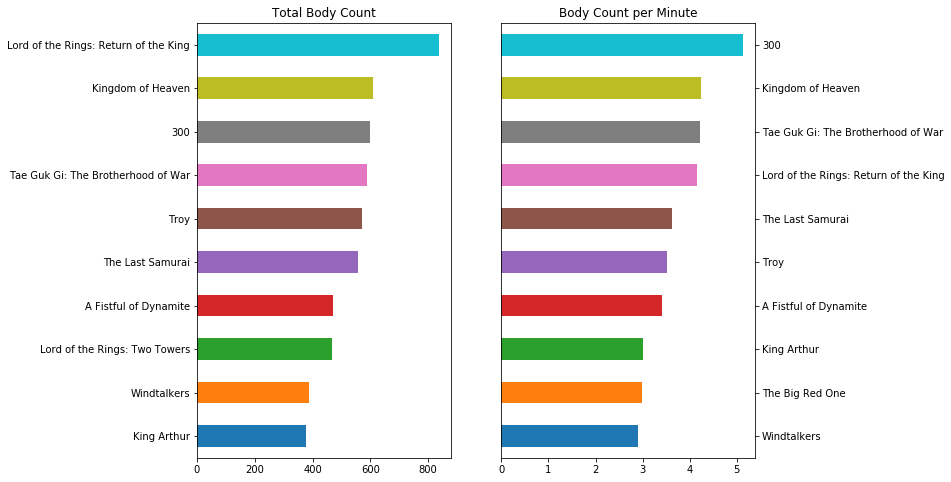

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# график для количества убитых людей в фильме. Горизонтальный график делаем параметром barh (bar horizontal)
movies_film.sort_values(by=['Body_Count'])['Body_Count'].tail(10).plot(
    kind='barh', ax=ax[0])
ax[0].set_title('Total Body Count')

movies_film.sort_values(by=['Body_Count_Min'])['Body_Count_Min'].tail(10).plot(
    kind='barh', ax=ax[1])  # для количества убитых людей на минуту фильма

ax[1].set_title('Body Count per Minute')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel(
        '', visible=False
    )  # убираем подпись к шкале, которая генерируется автоматически

# Рейтинги: график рассеяния для категориальной переменной

Графики рассеяния для категориальных переменных тоже имеют место быть. В данном случае у нас будет категориальная переменная по x (буквенный рейтинг фильма). Такой график помогает нам увидеть разброс значений в рамках категорий, а также некоторые корелляции и зависимости. Не забывайте только добавлять прозрачность, потому что в случае категориальных переменных большое количество точек может накладываться друг на друга.


In [142]:
movies['MPAA_Rating'].value_counts()

R           1082
PG-13        386
PG           122
Unrated       82
Approved      28
G             14
GP            13
M             13
X             10
NR             1
Name: MPAA_Rating, dtype: int64

**Упражнение:**
    
Постройте график рассеяния для MPAA_Rating по шкале x, Body_Count_Min по y и в качестве размера точки возьмите абсолютное значение Body Count.

Text(0,0.5,'Body count per minute')

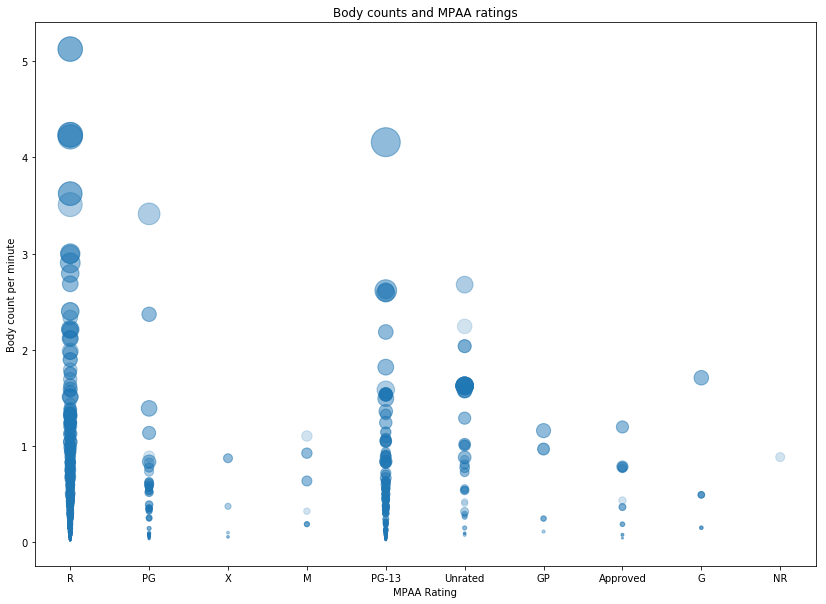

In [143]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(movies['MPAA_Rating'], movies['Body_Count_Min'], s=movies['Body_Count'], alpha=.2)
ax.set_title('Body counts and MPAA ratings')
ax.set_xlabel('MPAA Rating')
ax.set_ylabel('Body count per minute')


Проинтерпретируйте график.

Так же для работы с такими данными могут понадобиться такие графики, как swarmplot (например, есть в библиотеке seaborn). В таком графике столбец переменной немного расширен, что позволяет точкам немного распределиться по горизонтали.

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

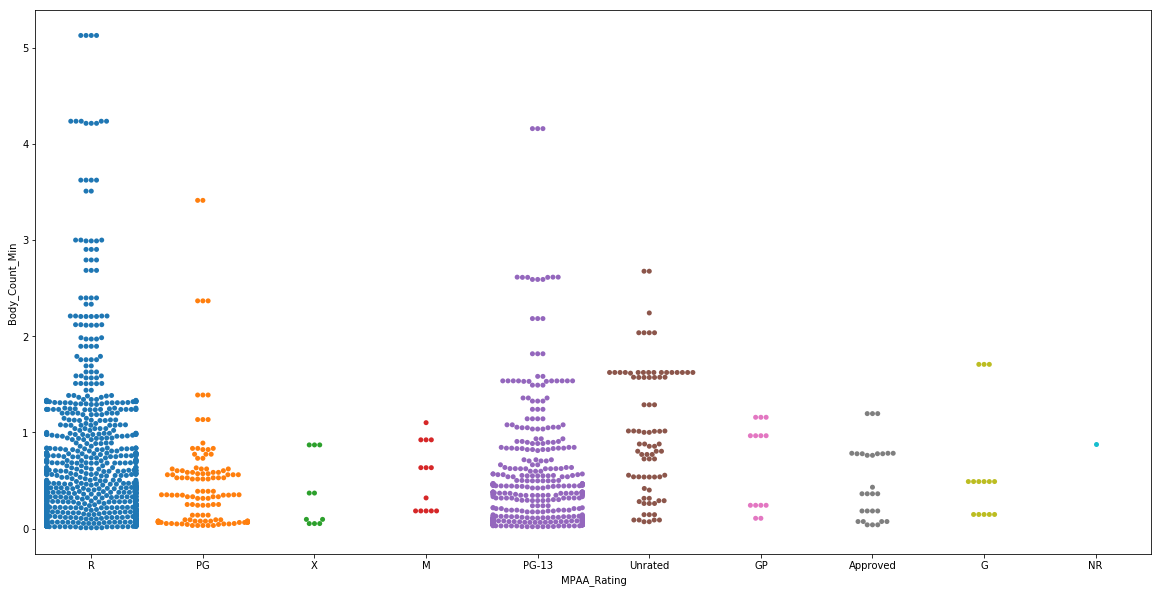

In [144]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize = (20,10))

sns.swarmplot(movies['MPAA_Rating'], movies['Body_Count_Min'])

# Рейтинги: график рассеяния, подписываем фильмы

Давайте построим график рассеяния для рейтинга imbd и body count per minute. А так же подпишем значения для трех самых жестоких фильмов.

In [145]:
movies.drop_duplicates('Film').sort_values(by=['Body_Count'], ascending=False).head(3) # находим три самых жестоких фильма


,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
769,Lord of the Rings: Return of the King,2003,836.0,PG-13,Action,Peter Jackson,201.0,8.9,1.0,4.159204
694,Kingdom of Heaven,2005,610.0,R,Action,Ridley Scott,144.0,7.1,1.0,4.236111
12,300,2007,600.0,R,Action,Zack Snyder,117.0,7.7,1.0,5.128205


In [146]:
bc_top = movies.drop_duplicates('Film').sort_values(by=['Body_Count'], ascending=False).head(3) # сохраним датафрейм из трех фильмов
annotations = []
for r in range(len(bc_top)): # сделаем цикл, который сложит нам в список тройки "название фильма - рейтинг - количество убийств на минуту фильма"
    annotations.append([bc_top['Film'].iloc[r], bc_top['IMDB_Rating'].iloc[r], bc_top['Body_Count_Min'].iloc[r]])
annotations

[['Lord of the Rings: Return of the King', 8.9, 4.159203980099503],
 ['Kingdom of Heaven', 7.1, 4.236111111111111],
 ['300', 7.7, 5.128205128205129]]

**Упражнение:**

Сделайте график рассеяния для рейтинга imdb по x, body count per minute для y, и body count для размера точки. Если не успеваем - посмотрите дома самостоятельно, как сделать подписи.

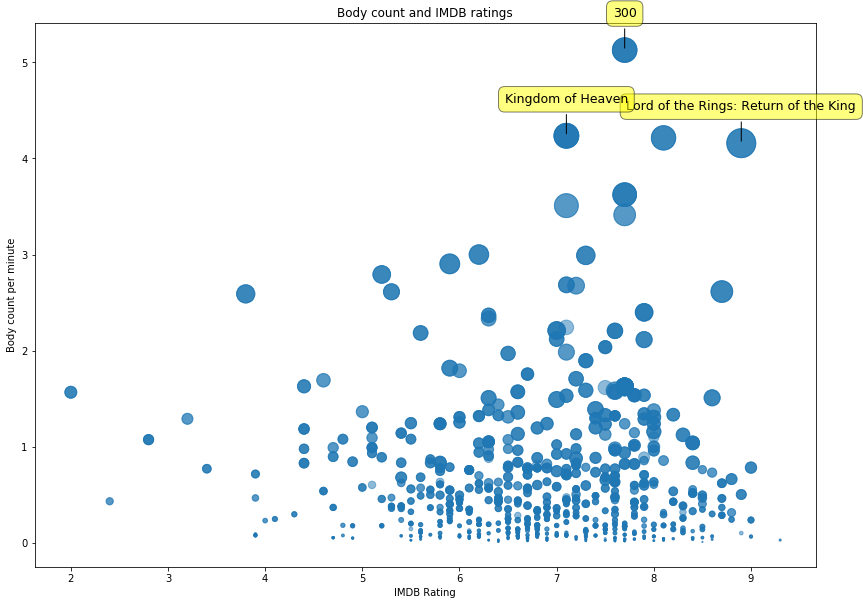

In [147]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(movies['IMDB_Rating'], movies['Body_Count_Min'], s=movies['Body_Count'], alpha=.5)
ax.set_title('Body count and IMDB ratings')
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Body count per minute')

for annotation, x, y in annotations: # идем в наш список с тремя фильмами и итерируемся по нему
    plt.annotate(   # функция, которая подпишет наблюдения в нашем графики
        annotation, # обращаемся к названию фильма
        xy=(x, y),  # задаем координаты точек
        xytext=(0, 30), # задаем координаты текста (смещение на 30 единиц вверх по y)
        textcoords='offset points',
        ha='center',
        va='bottom',
        size=12.5,
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='-'))

## Делаем совмещенные столбчатые диграммы из агрегированных данных

In [148]:
bc = pd.DataFrame({'mean_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count'].mean(),
                        'median_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count'].median()})

bc_min = pd.DataFrame({'mean_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count_Min'].mean(),
                           'median_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count_Min'].median()})

In [153]:
# альтернативный вариант групировки
group_year = movies.groupby('Year').agg([np.mean, np.median, sum])
group_year.head()

Body_Count               Length_Minutes               Film_Count         \
           mean median    sum           mean median    sum       mean median   
Year                                                                           
1949        4.0    4.0   12.0          104.0  104.0  312.0        1.0    1.0   
1954       56.0   50.0  280.0          138.6   93.0  693.0        1.0    1.0   
1957       67.0   67.0  134.0           88.0   88.0  176.0        1.0    1.0   
1959        7.0    7.0   28.0           79.0   79.0  316.0        1.0    1.0   
1960       55.0   55.0   55.0          128.0  128.0  128.0        1.0    1.0   

          Body_Count_Min                      
      sum           mean    median       sum  
Year                                          
1949  3.0       0.038462  0.038462  0.115385  
1954  5.0       0.448185  0.537634  2.240923  
1957  2.0       0.761364  0.761364  1.522727  
1959  4.0       0.088608  0.088608  0.354430  
1960  1.0       0.429688  0.429688  0.429688

In [154]:
bc.head()

,mean_value,median_value
Year,,
1949,4.0,4.0
1954,57.5,57.5
1957,67.0,67.0
1959,7.0,7.0
1960,55.0,55.0


In [155]:
bc_min.head()

,mean_value,median_value
Year,,
1949,0.038462,0.038462
1954,0.425822,0.425822
1957,0.761364,0.761364
1959,0.088608,0.088608
1960,0.429688,0.429688


Text(0.5,1,'Body Count by Minute')

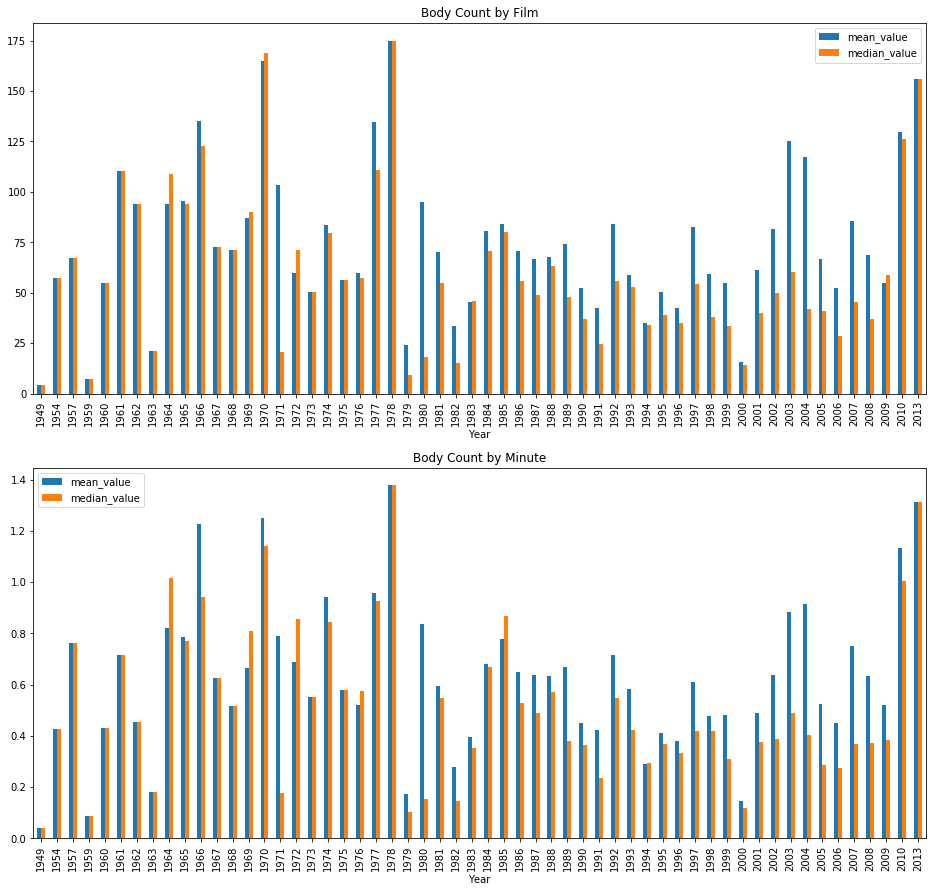

In [156]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))

bc.plot(kind='bar', ax=ax[0])
ax[0].set_title('Body Count by Film')

bc_min.plot(kind='bar', ax=ax[1])
ax[1].set_title('Body Count by Minute')
  

## Упражнение: по аналогии с фильмами найдите самых жестоких режиссеров (тут уже не выкидываем дубликаты)

In [157]:
movies_dir = movies.groupby('Director').sum().sort_values(by=['Body_Count']).tail(10)

In [158]:
movies_dir

,Body_Count,Length_Minutes,Film_Count,Body_Count_Min
Director,,,,
Uwe Boll,1818.0,1031.0,10.0,16.766390
Steven Spielberg,1824.0,3360.0,23.0,12.095150
Antoine Fuqua,2015.0,1699.0,15.0,16.781665
Wolfgang Petersen,2095.0,1439.0,11.0,15.862454
Robert Rodriguez,2645.0,2186.0,18.0,21.028373
Zack Snyder,3155.0,1358.0,11.0,27.126865
Ridley Scott,3562.0,2601.0,19.0,24.768490
Edward Zwick,3567.0,1411.0,10.0,24.760846
Peter Jackson,4502.0,2630.0,15.0,24.186545


In [159]:
movies_dir_mean = movies_dir.groupby('Director').mean().sort_values(by=['Body_Count_Min']).tail(10)
movies_dir_mean

,Body_Count,Length_Minutes,Film_Count,Body_Count_Min
Director,,,,
Steven Spielberg,1824.0,3360.0,23.0,12.095150
Wolfgang Petersen,2095.0,1439.0,11.0,15.862454
Uwe Boll,1818.0,1031.0,10.0,16.766390
Antoine Fuqua,2015.0,1699.0,15.0,16.781665
Robert Rodriguez,2645.0,2186.0,18.0,21.028373
Peter Jackson,4502.0,2630.0,15.0,24.186545
Edward Zwick,3567.0,1411.0,10.0,24.760846
Ridley Scott,3562.0,2601.0,19.0,24.768490
Zack Snyder,3155.0,1358.0,11.0,27.126865


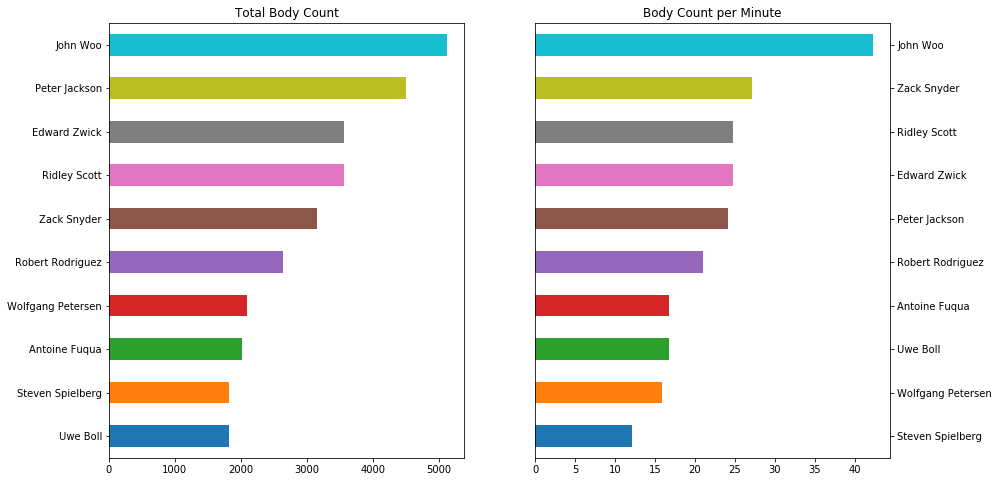

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

movies_dir['Body_Count'].plot(kind='barh', ax=ax[0])
ax[0].set_title('Total Body Count')

movies_dir_mean['Body_Count_Min'].plot(kind='barh', ax=ax[1])
ax[1].set_title('Body Count per Minute')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False)

## Агрегация по жанрам (подсчет абсолютных значений и самые высокие средние значения)

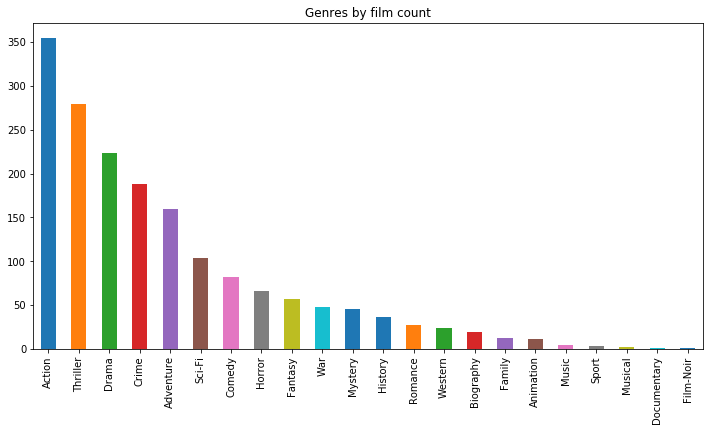

In [161]:
movies['Genre'].value_counts().plot(kind='bar', figsize=(12, 6), title='Genres by film count')


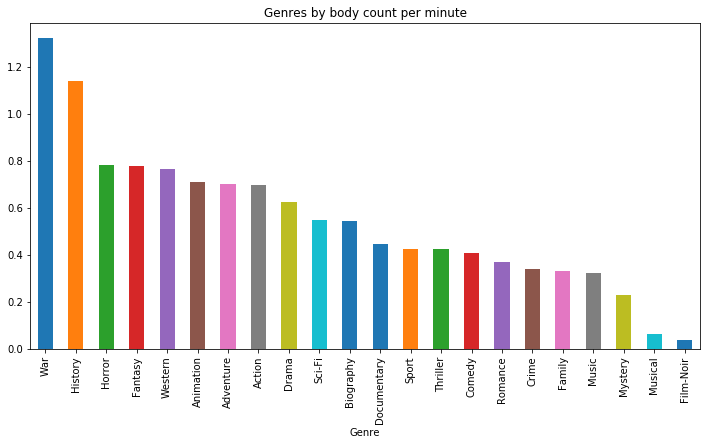

In [162]:
movies.groupby('Genre').mean().sort_values(by=['Body_Count_Min'], ascending=False)['Body_Count_Min'].plot(kind='bar', figsize=(12, 6), title='Genres by body count per minute')